In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns

import os
from pathlib import Path
import sys


print(np.__version__) # 1.26.4 used
print(pd.__version__) # 2.2.2 used
print(scipy.__version__) # 1.12.0 used
print(matplotlib.__version__) # 3.8.0 used
print(sns.__version__) # 0.13.2 used

1.26.4
2.2.2
1.13.1
3.8.4
0.13.2


In [2]:
# Jupyter Notebook solution  --------------------------------------------------------------------------------------------
notebook_dir = os.getcwd() # notebook specific
notebook_name = "testing_plotting_alexa.ipynb" # notebook specific name

PATH = Path(notebook_dir) / Path(notebook_name) # notebook specific

# alt script version -----------------------------------------------------------------------------------------------------
# PATH = Path(__file__)

# Common for notebooks and scripts alike
sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths, get_plot_path
setup_project_paths(PATH)

In [3]:
PATH_RAW_VIEWSER, PATH_RAW_EXTERNAL, PATH_PROCESSED, PATH_GENERATED = get_data_paths(PATH)

# lest print the paths
print(PATH_RAW_VIEWSER)
print(PATH_RAW_EXTERNAL)
print(PATH_PROCESSED)
print(PATH_GENERATED) 

PLOT_PATH = get_plot_path(PATH)
print(PLOT_PATH)

PATH_ROOT = setup_root_paths(PATH)
print(PATH_ROOT)

PATH_TESTING_PLOTS = PATH_ROOT / 'notebooks/alexa_experiments/event_catalogue_r1/testing_plots_alexa.ipynb'
print(PATH_TESTING_PLOTS)



/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/raw_viewser
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/raw_external
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/processed
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/generated
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/reports/plots
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/notebooks/alexa_experiments/event_catalogue_r1/testing_plots_alexa.ipynb


In [4]:
# load the data from the pkl
df_monthly = pd.read_pickle(PATH_GENERATED / "df_monthly_country_return_periods.pkl")
df_yearly = pd.read_pickle(PATH_GENERATED / "df_yearly_country_return_periods.pkl")

In [5]:
# subsetting the data to only include years up to 2020
df_yearly_2020 = df_yearly[df_yearly["year_id"] <= 2020]

In [6]:
from utils_get_time_period import get_time_period
from utils_date_index import calculate_date_from_index
from utils_get_country_id_by_name import get_country_id_by_name
from utils_get_country_names_by_ids import get_country_names_by_ids
# from utils_plotting_country_time_series import plot_country_time_series
# from utils_plotting_country_period_map import plot_country_period_map

Number of country IDs: 13
Number of titles: 13
Number of colors: 13


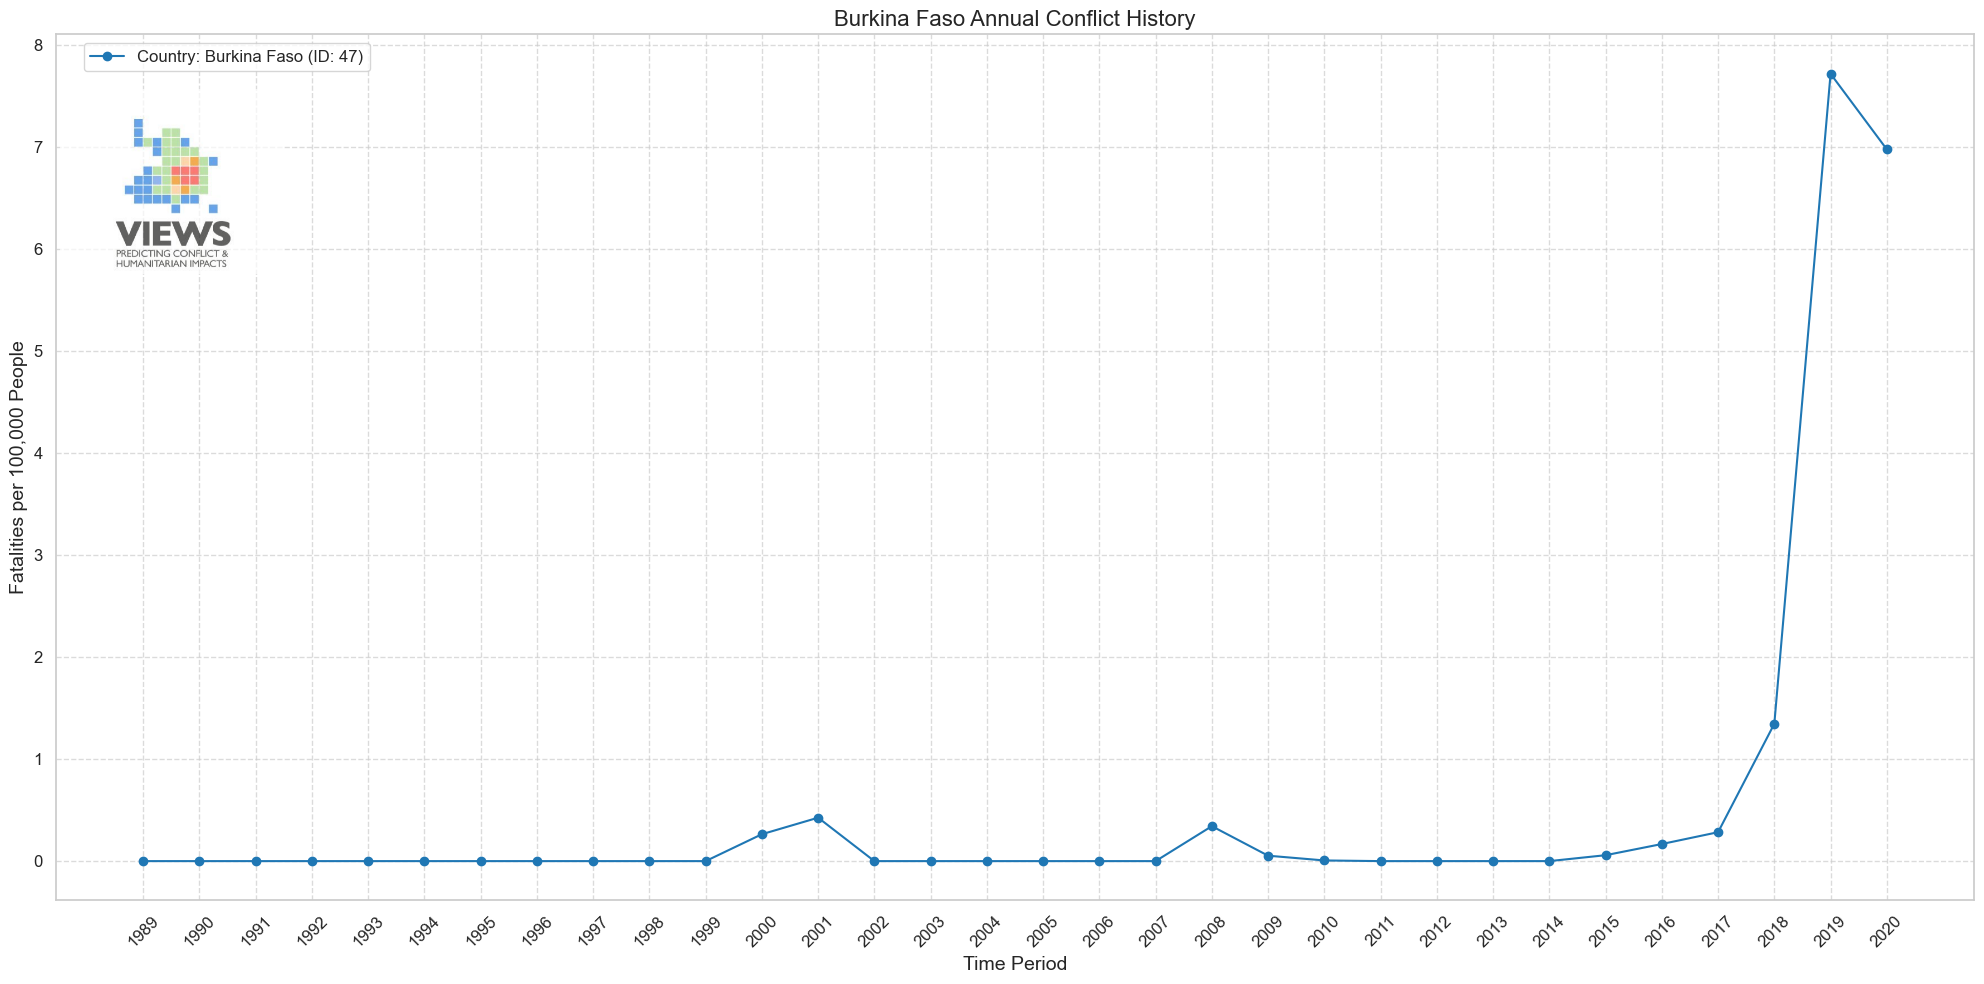

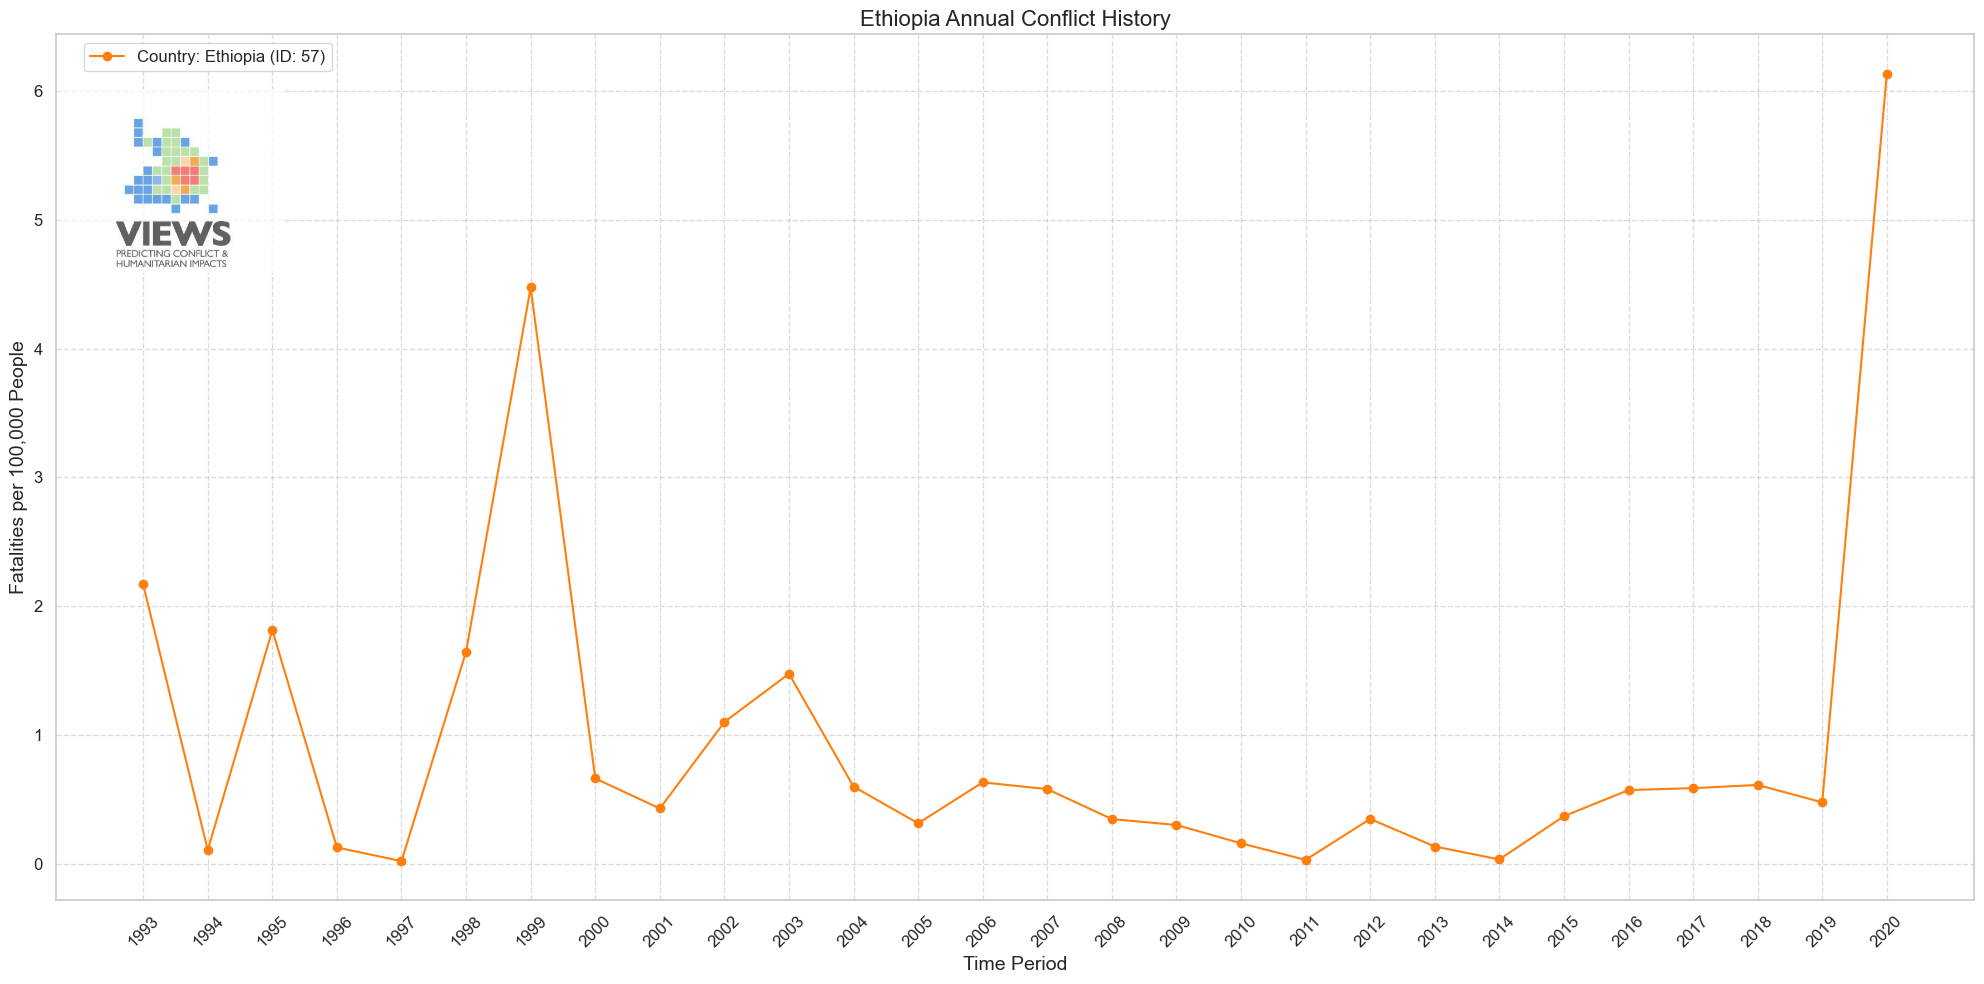

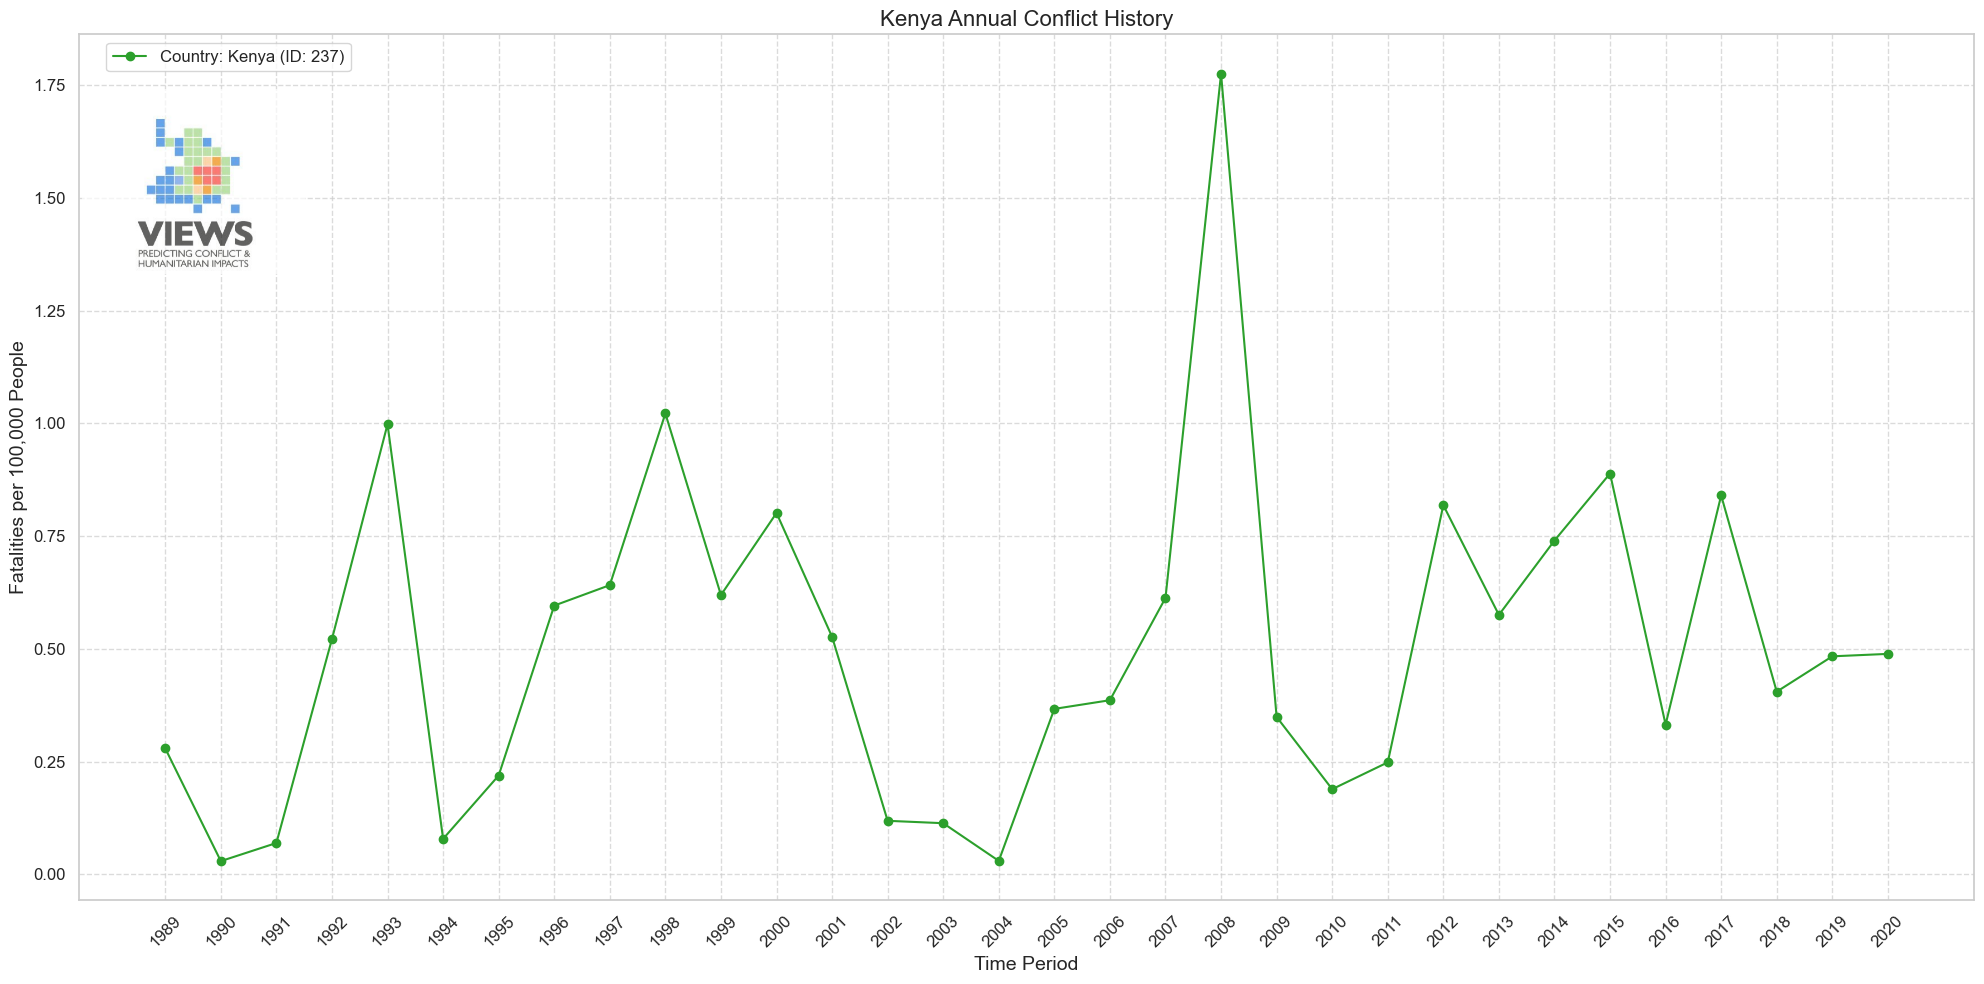

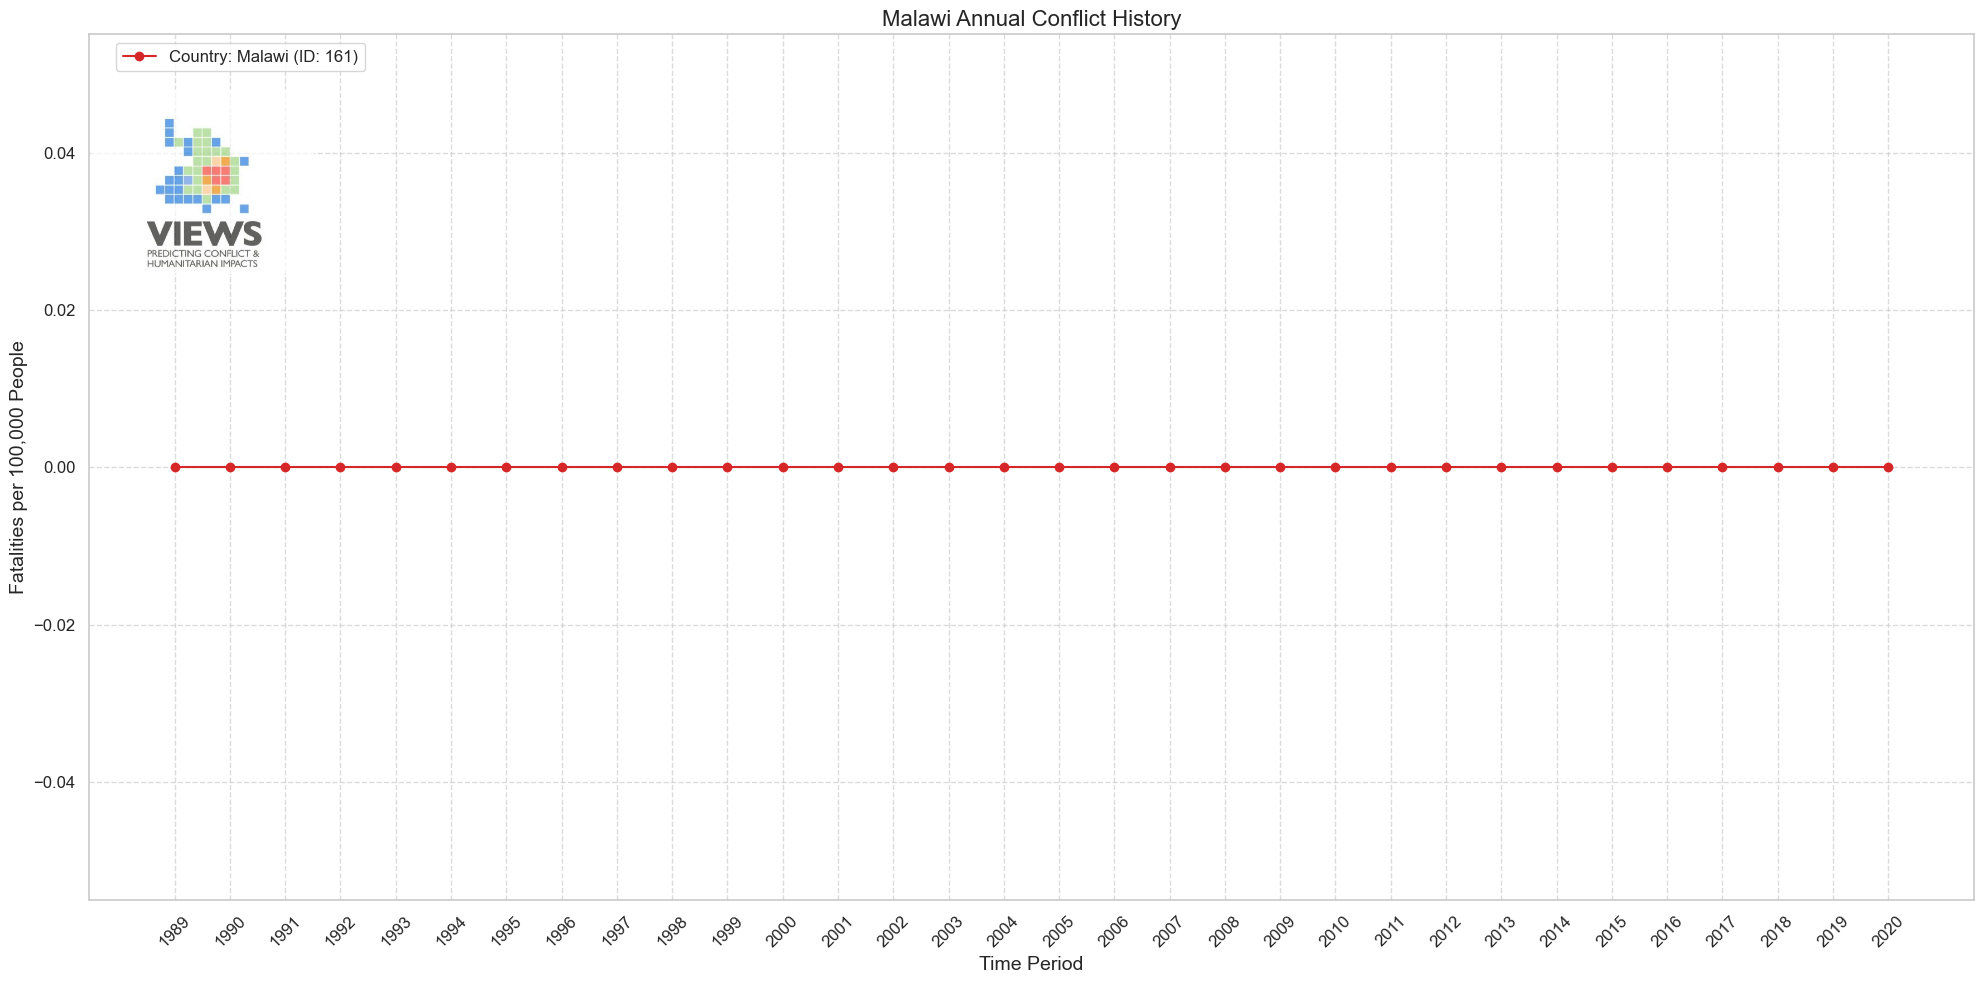

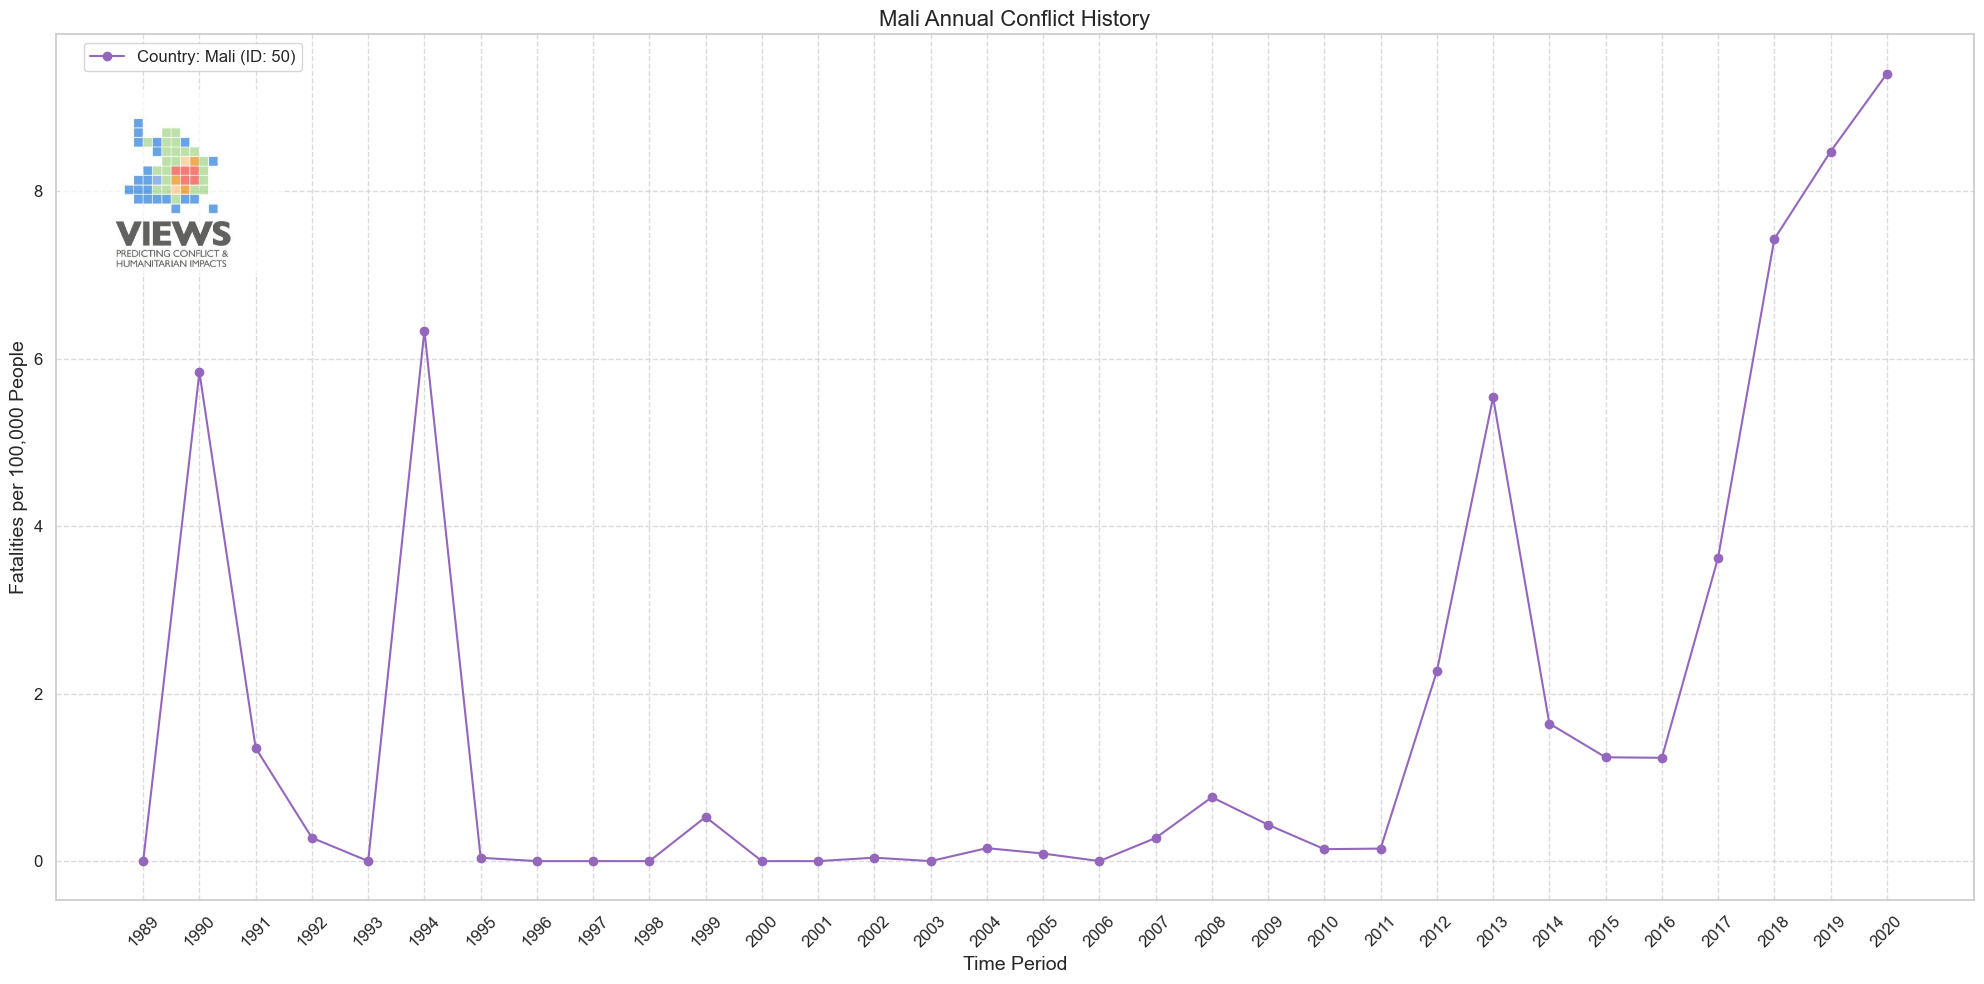

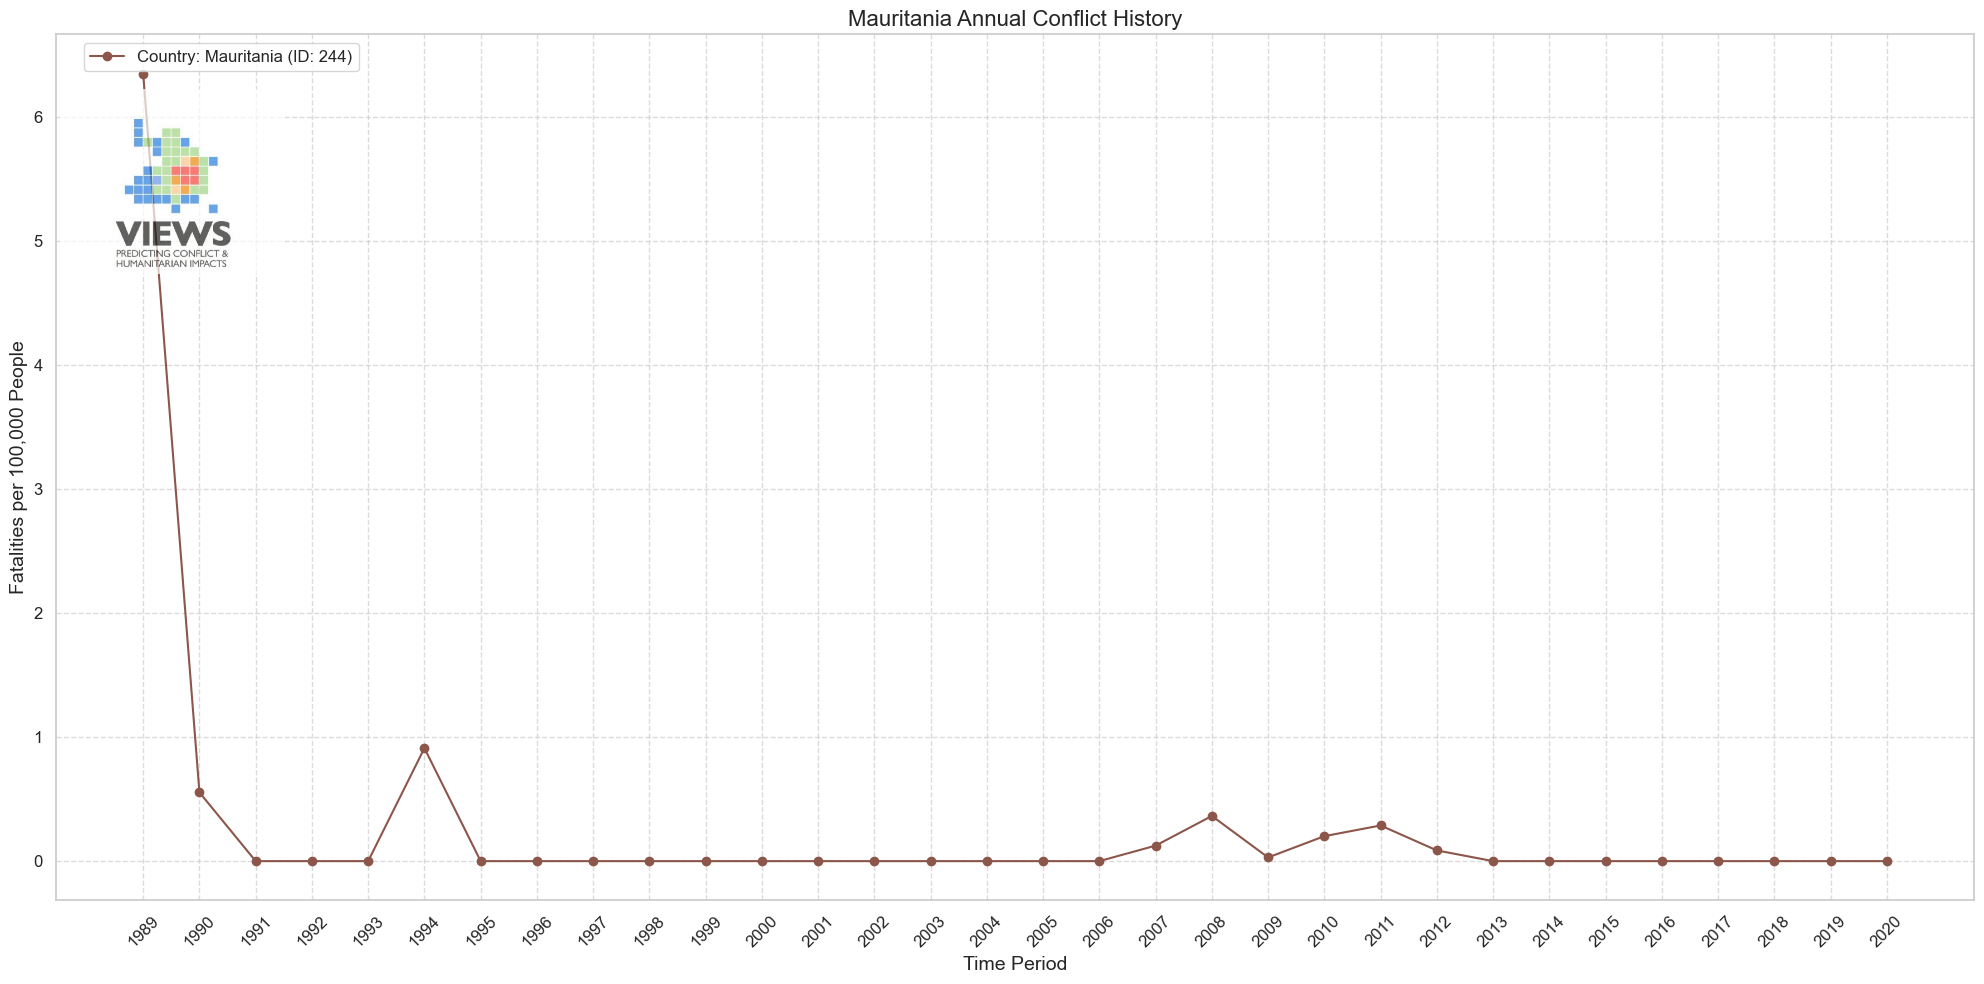

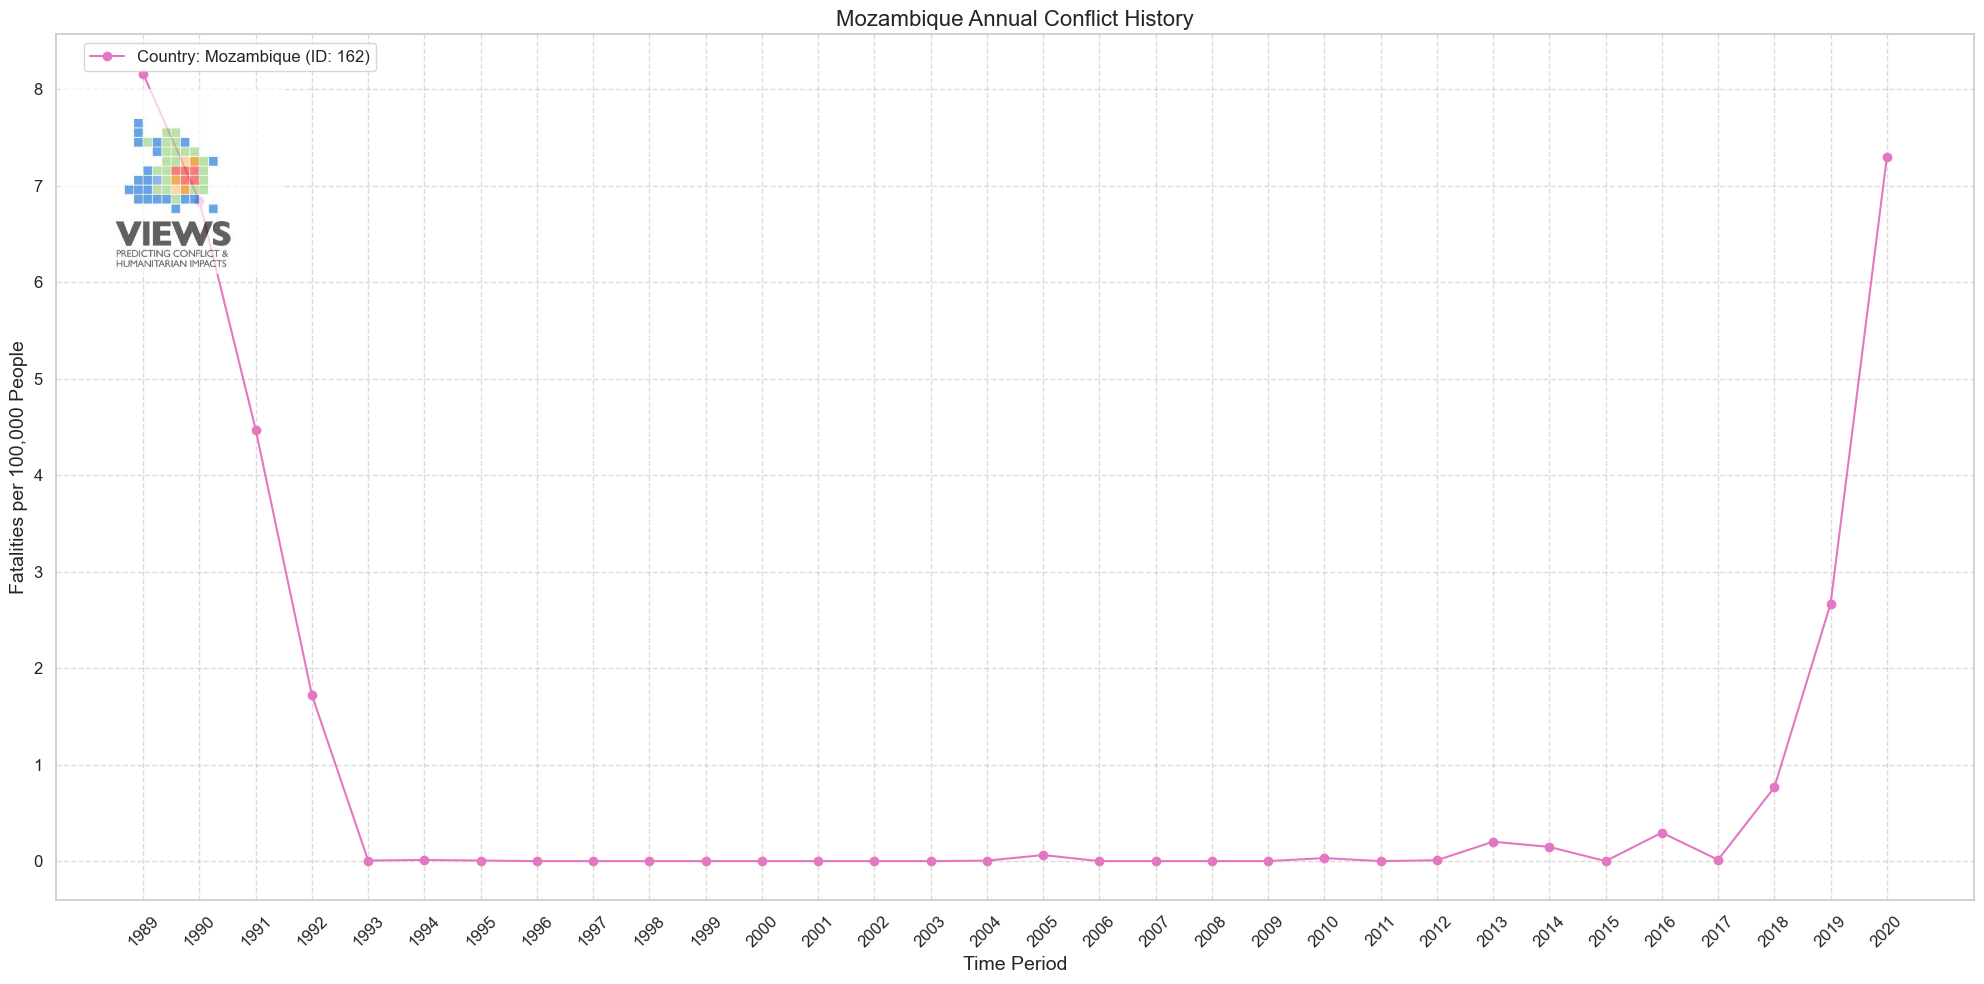

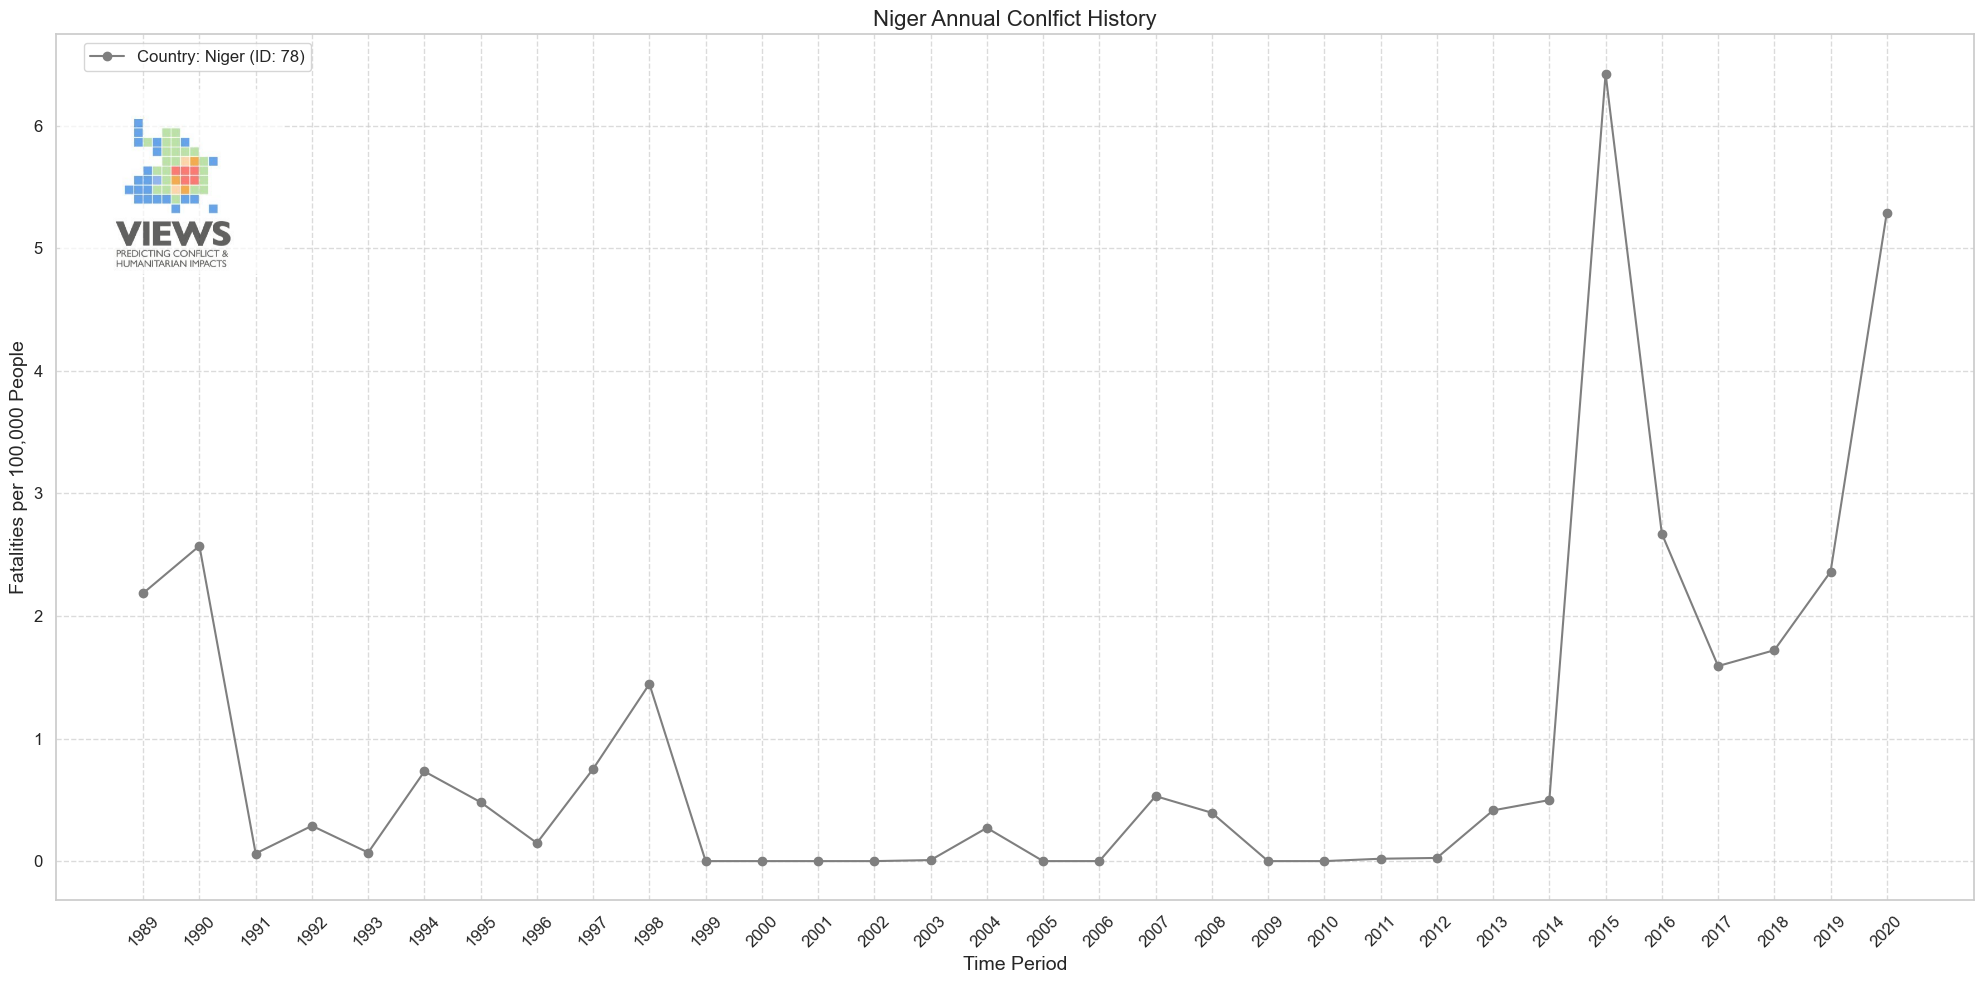

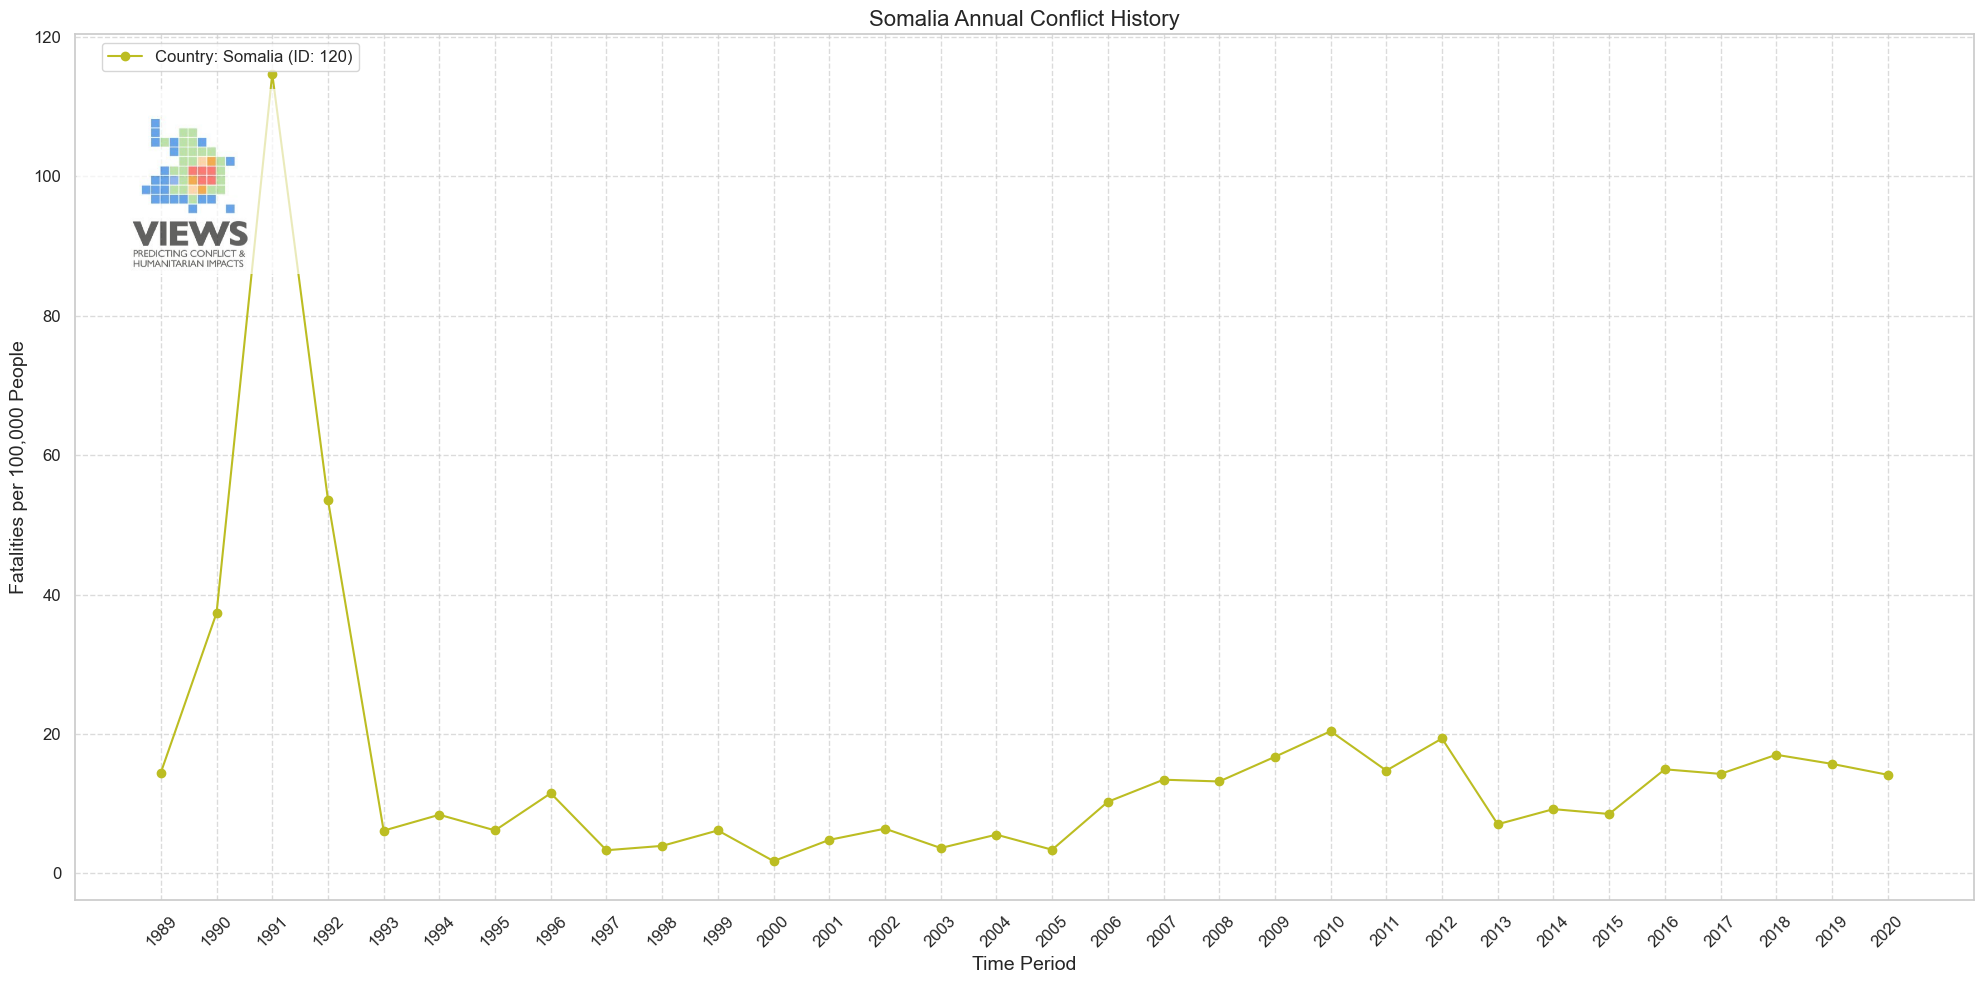

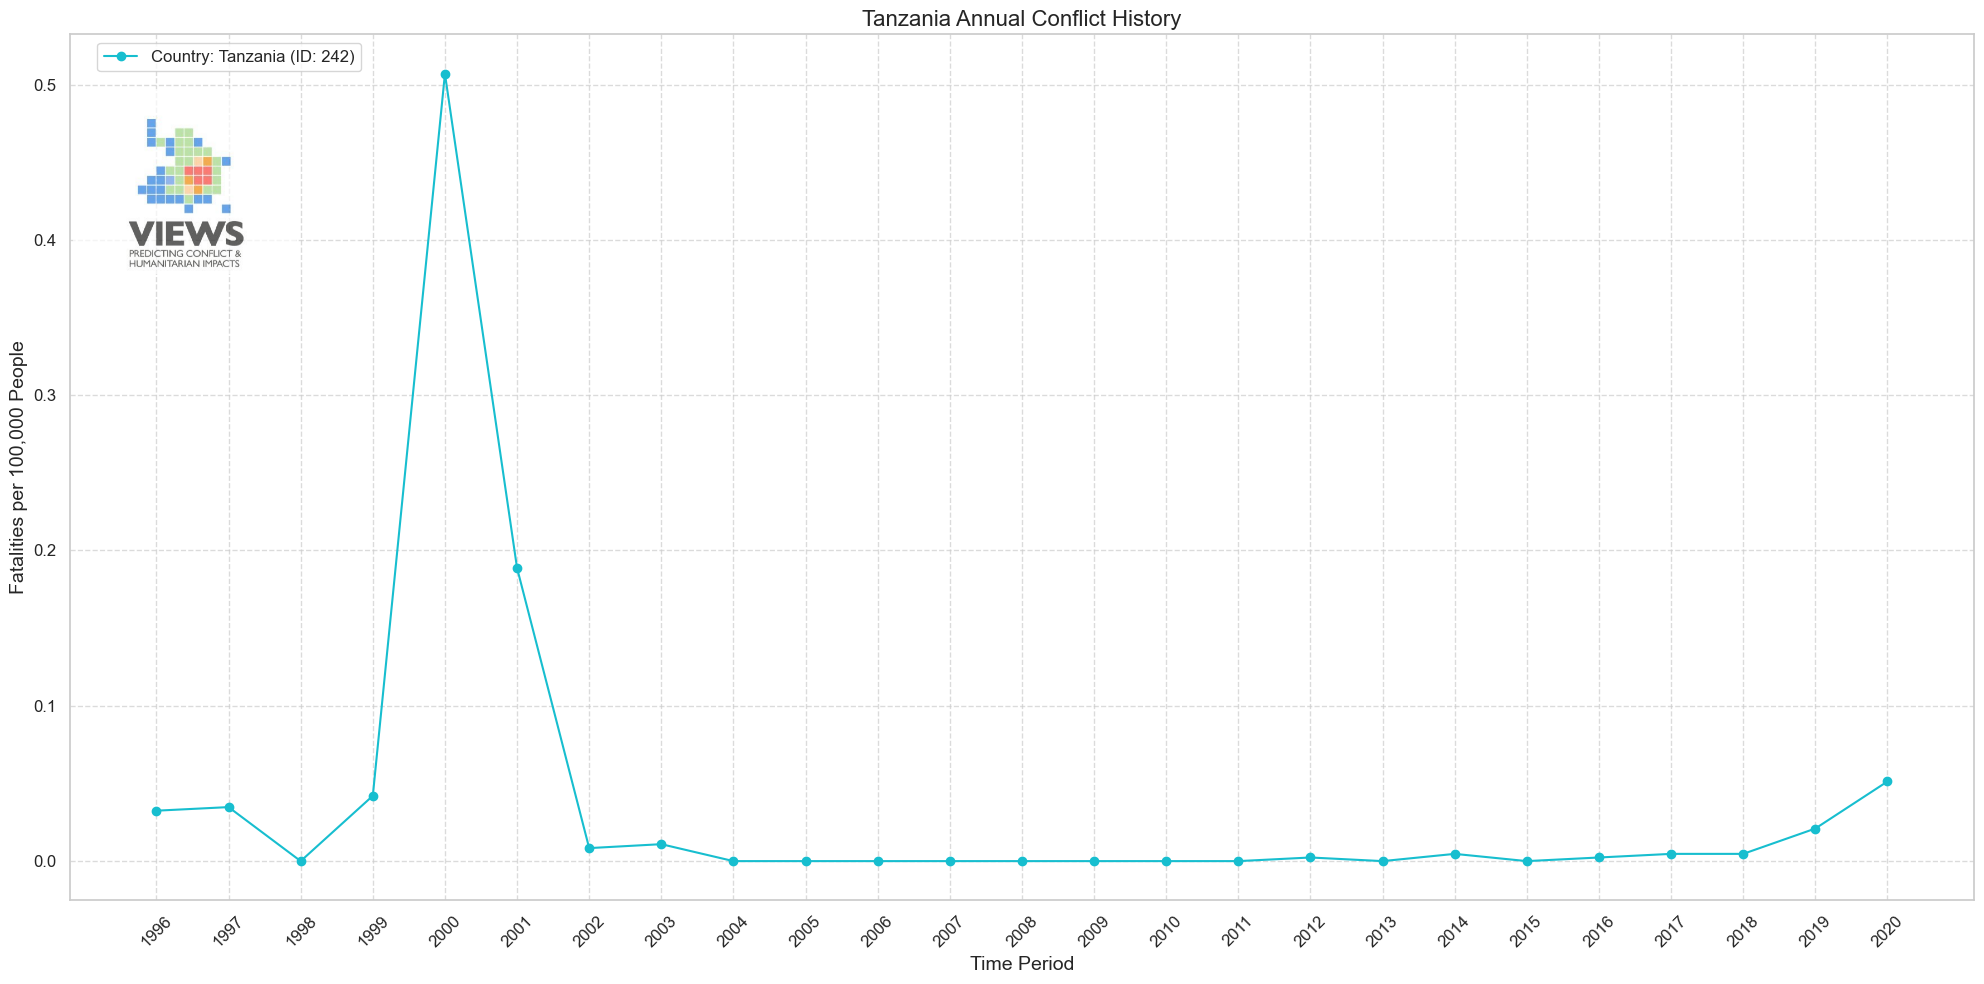

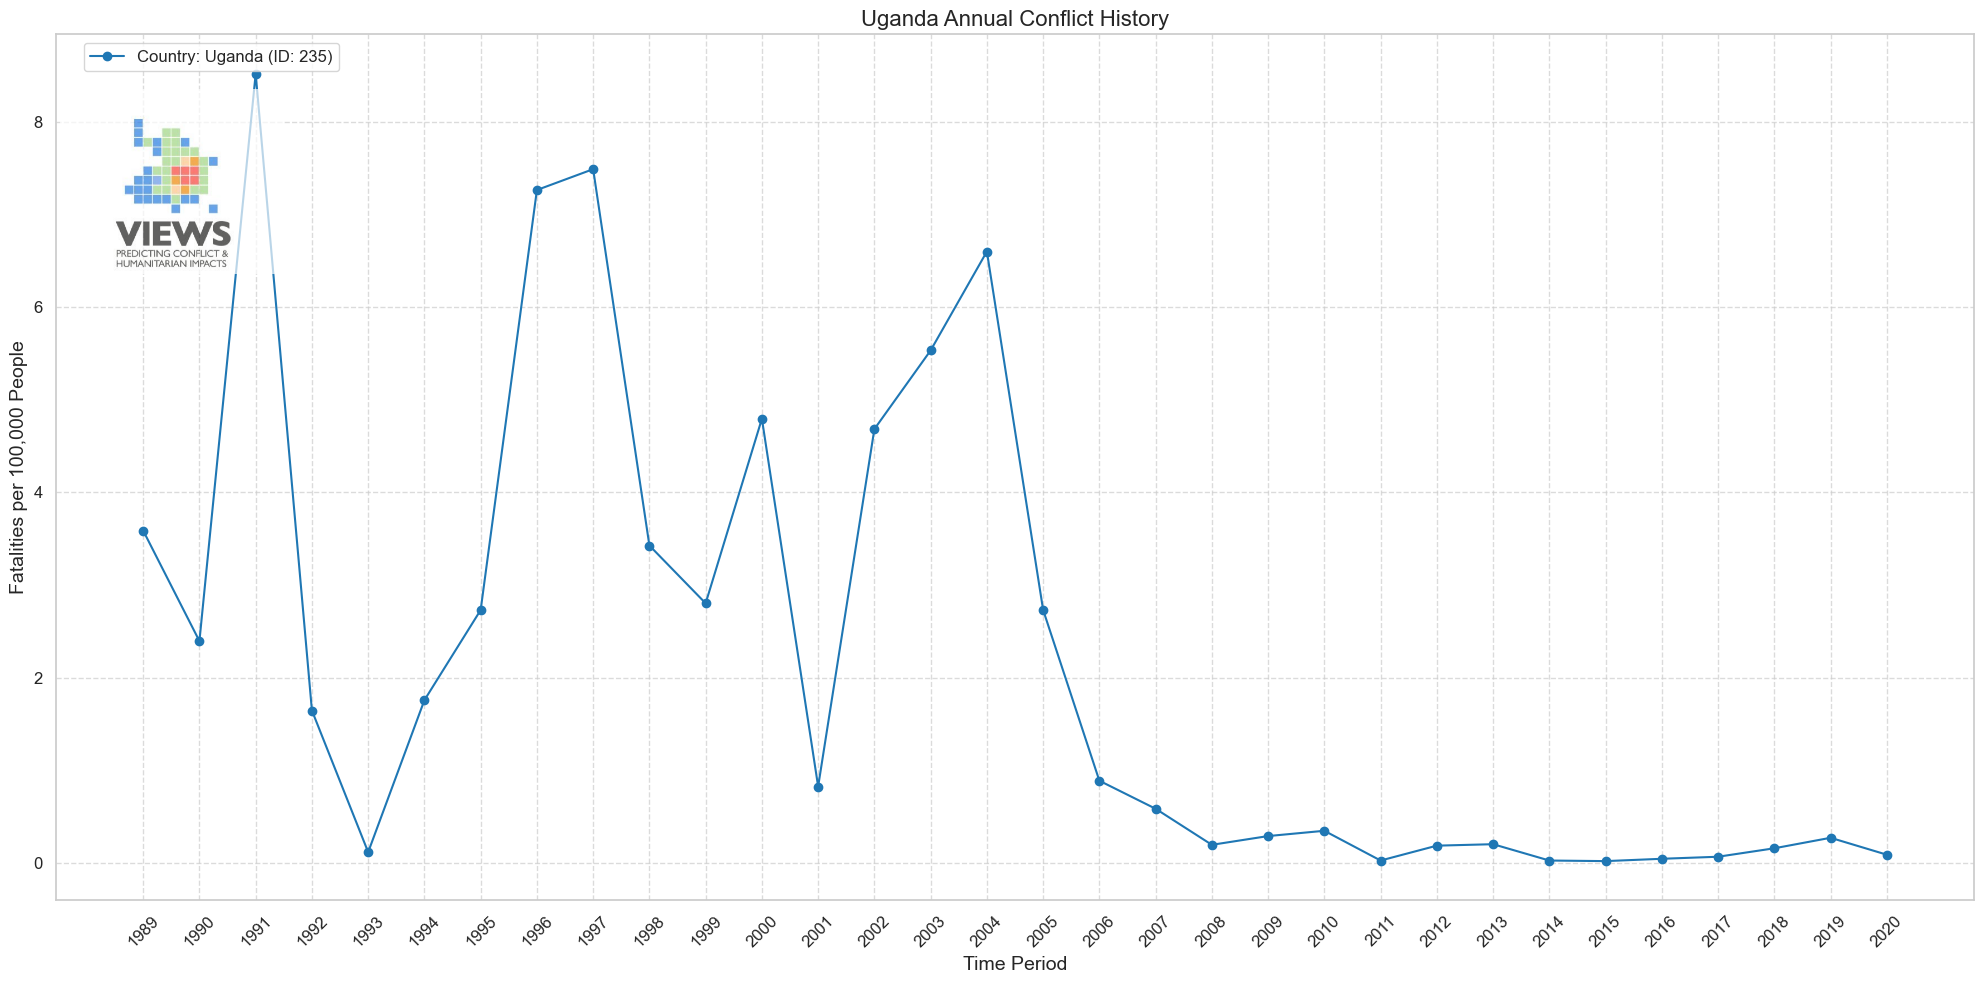

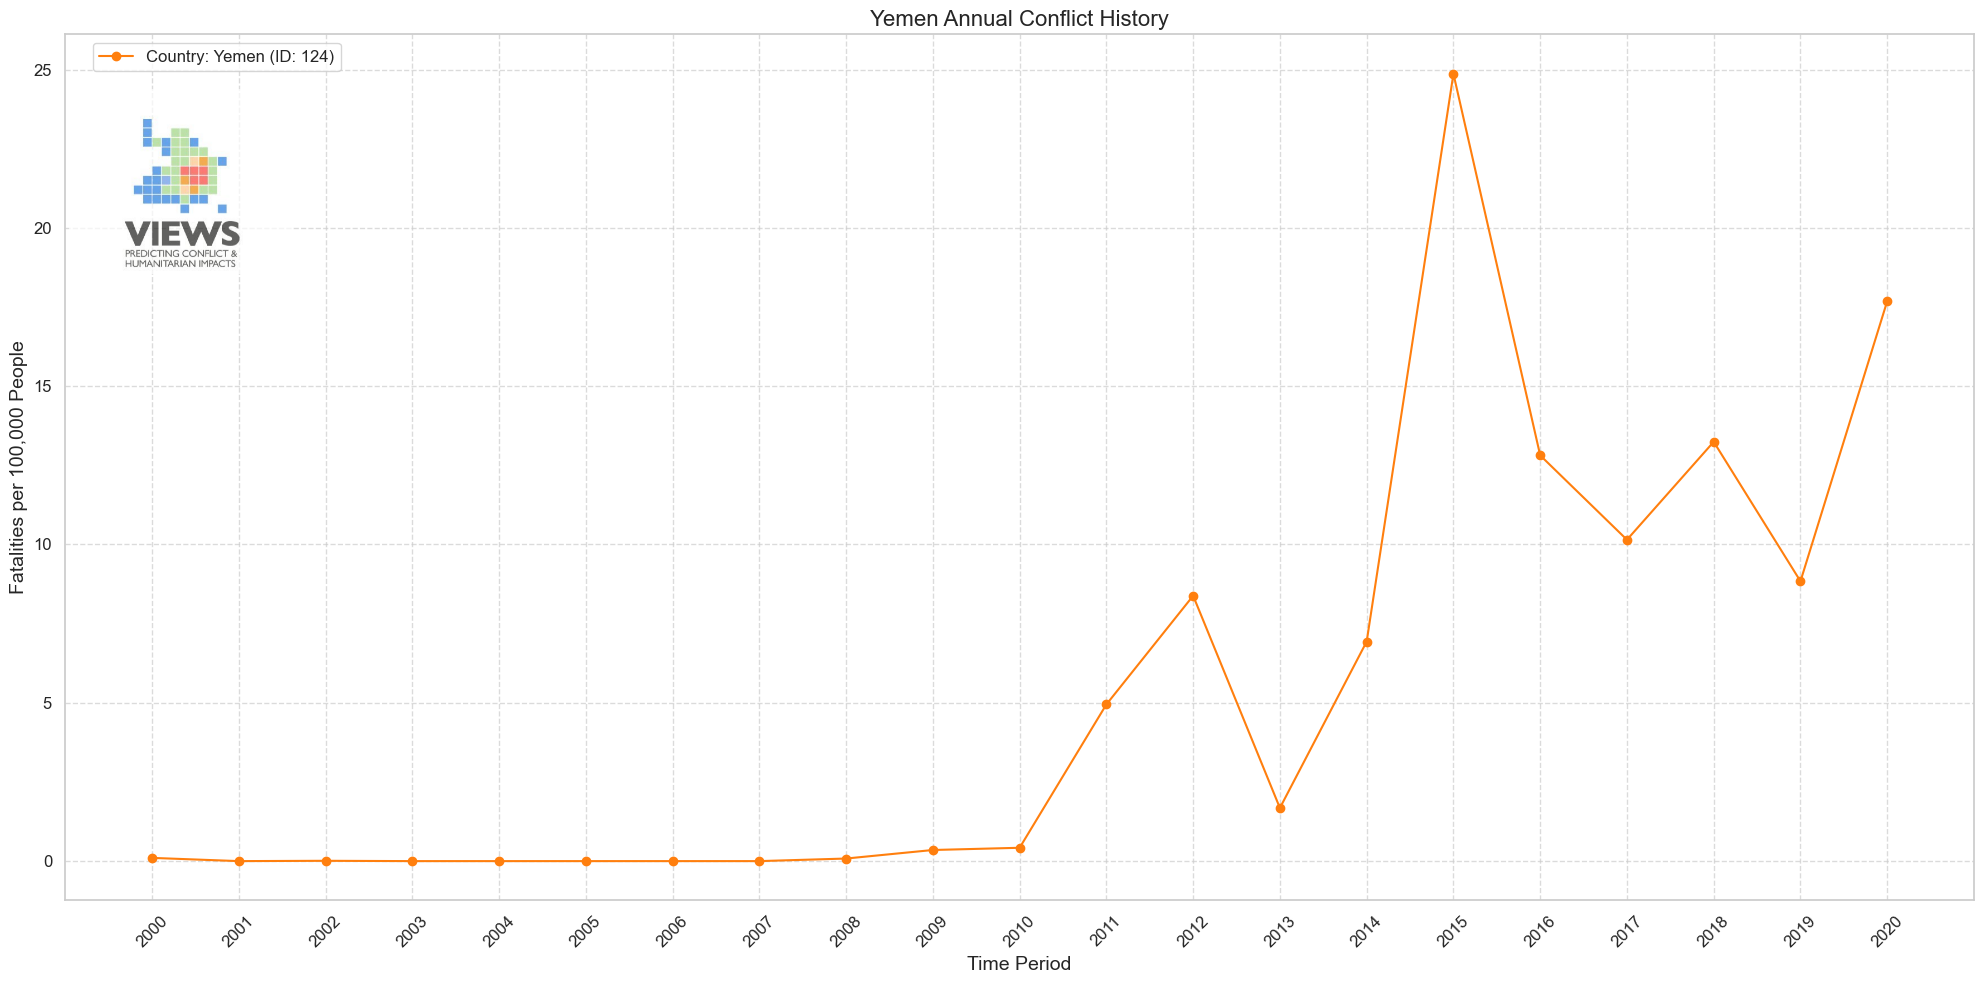

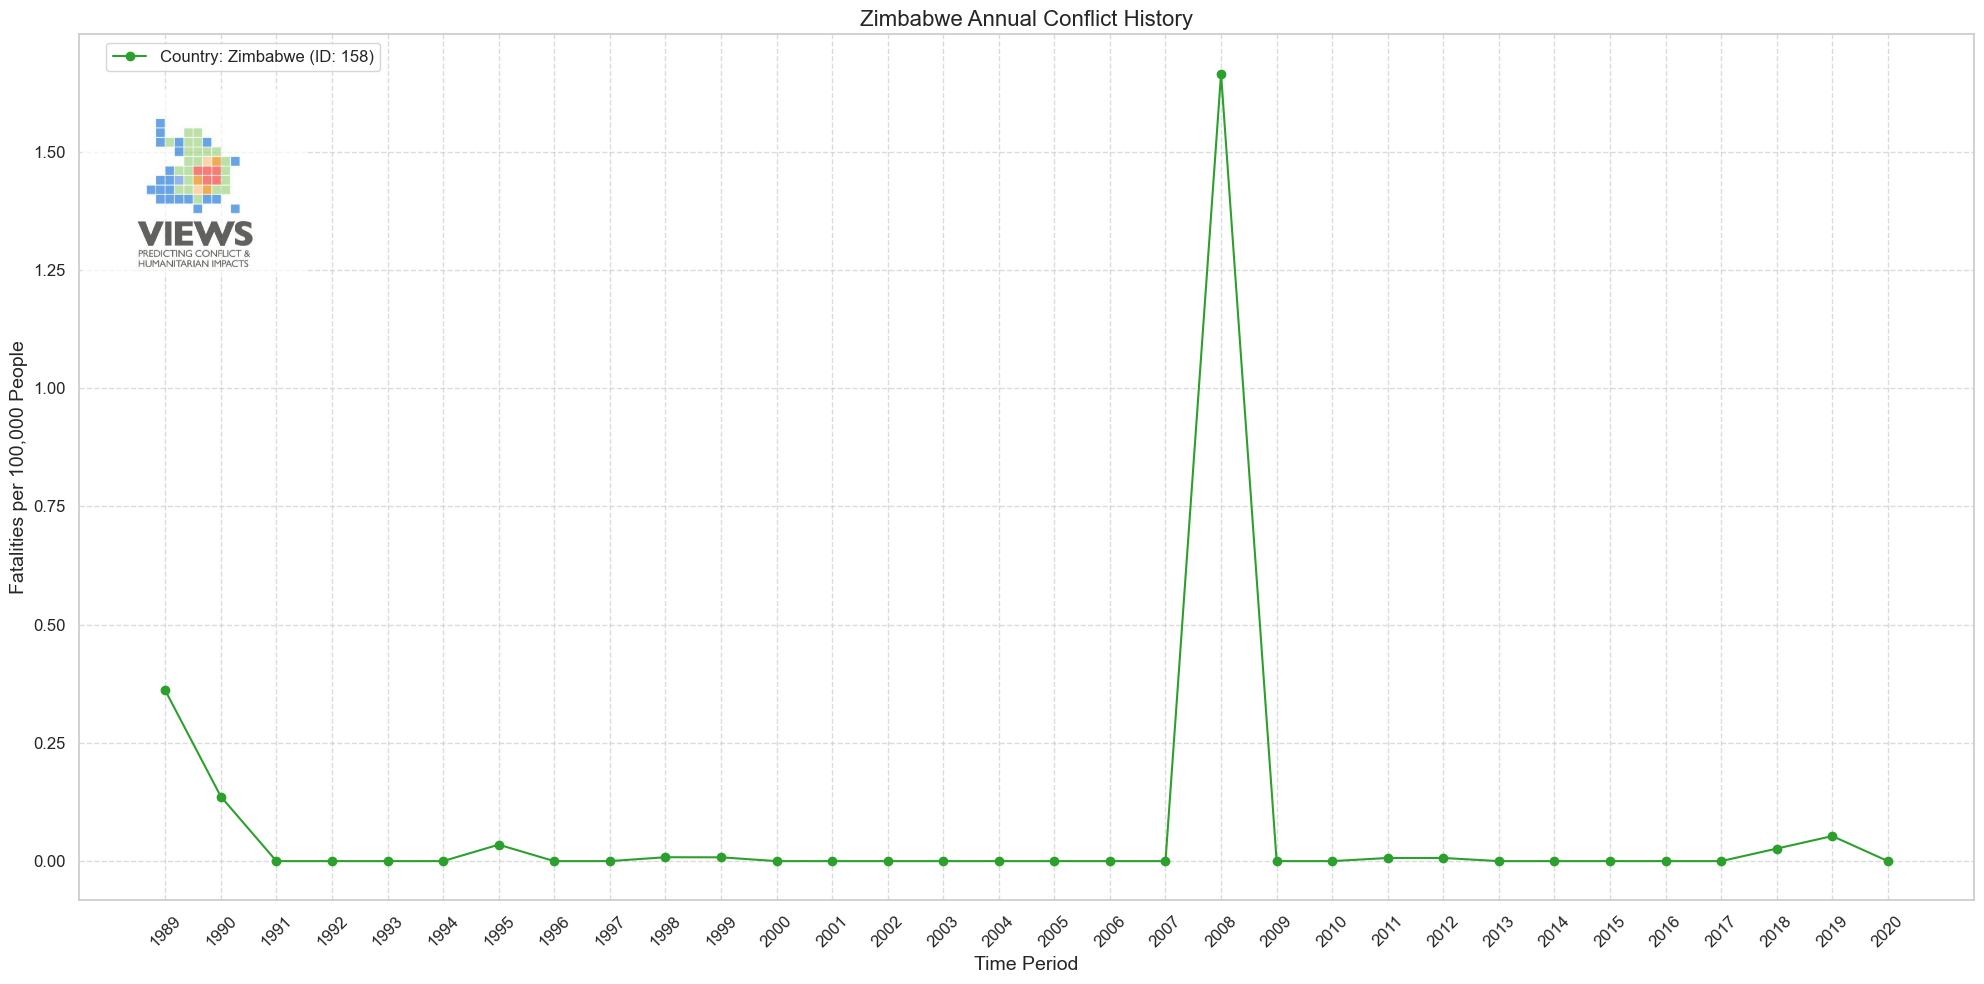

In [7]:
# testing new plotting functions 
from utils_plotting_country_time_series import plot_country_time_series

country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]

# looping through and plotting each country_id in its own plot

# Define a list of colors - giving different colours to each country
colors = sns.color_palette("tab10", len(country_ids))

# Define manual titles to loop through
titles = ["Burkina Faso Annual Conflict History", "Ethiopia Annual Conflict History",
            "Kenya Annual Conflict History", "Malawi Annual Conflict History",
            "Mali Annual Conflict History", "Mauritania Annual Conflict History",
            "Mozambique Annual Conflict History", "Niger Annual Conlfict History",
            "Somalia Annual Conflict History", "Tanzania Annual Conflict History",
            "Uganda Annual Conflict History", "Yemen Annual Conflict History",
            "Zimbabwe Annual Conflict History"]

# Debugging statements to check the lengths of the lists
print(f"Number of country IDs: {len(country_ids)}")
print(f"Number of titles: {len(titles)}")
print(f"Number of colors: {len(colors)}")

# Ensure the lengths of country_ids and titles match
if len(country_ids) != len(titles):
    raise ValueError("The lengths of country_ids and titles do not match.")


for idx, country_id in enumerate(country_ids):
    plot_country_time_series(df_yearly_2020, [country_id], "total_best_per_100k_country",
                              manual_title=titles[idx], manual_ylabel="Fatalities per 100,000 People",
                              figsize=(20, 10), logo_placement=(0.06, 0.83),
                              logo_size=0.4, legend_placement=(0.01, 1),
                              force_color=colors[idx])

In [38]:
print(df_yearly["total_best_b_i"].max())
print(df_yearly["total_best_b_i"].min())

print(df_yearly["total_best_B_i"].max())
print(df_yearly["total_best_B_i"].min())

# print the range of total_best_b_i values when year_id is 2020 and c_id is 47
print(df_yearly[(df_yearly["c_id"] == 47) & (df_yearly["year_id"] == 2020)]["total_best_b_i"].unique())

10000
0
32
0
[0]


In [50]:
df_yearly[(df_yearly["c_id"] == 47) & (df_yearly["total_best_e_i"] != 0) & (df_yearly["year_id"] == 2020)].head(20)

# why are there only binned zeor values for 2020? when total_best_e_i has high enough max values? check max values

,pg_id,year_id,c_id,row,col,sb_best,ns_best,os_best,pop_gpw_sum,total_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
31,143632,2020,47,200,352,0.0,0.0,0.0,34662.125000,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0
66,144351,2020,47,201,351,1.0,0.0,0.0,75699.921875,1.0,...,12.634855,1.000767,0,0,0,0,0,0,0,0
101,144352,2020,47,201,352,7.0,0.0,0.0,33986.812500,7.0,...,16.283422,1.004046,0,0,0,0,0,0,0,0
136,144353,2020,47,201,353,0.0,0.0,0.0,45830.007812,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0
171,144354,2020,47,201,354,0.0,0.0,0.0,125883.000000,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0
206,145070,2020,47,202,350,0.0,0.0,0.0,125392.117188,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0
241,145071,2020,47,202,351,8.0,0.0,0.0,164649.953125,8.0,...,17.011173,1.005166,0,0,0,0,0,0,0,0
276,145072,2020,47,202,352,0.0,0.0,0.0,74574.804688,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0
311,145073,2020,47,202,353,0.0,0.0,0.0,61078.152344,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0
346,145074,2020,47,202,354,0.0,0.0,0.0,143426.328125,0.0,...,1.000000,1.000000,0,0,0,0,0,0,0,0


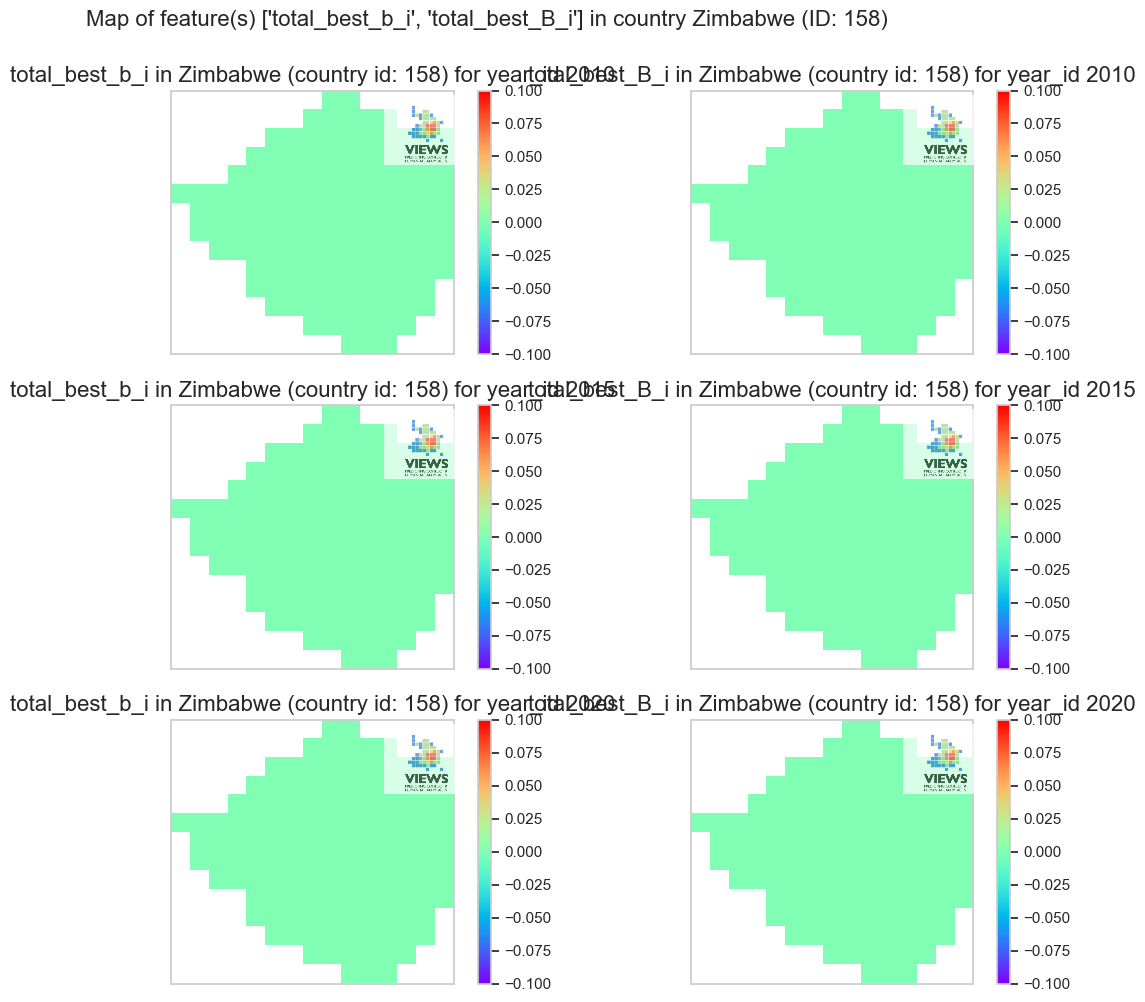

In [35]:
country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]


# testing new mapping functions
from utils_plotting_country_period_map import plot_country_period_map

plot_country_period_map(df_yearly, 158, ["total_best_b_i", "total_best_B_i"], [2010, 2015, 2020], figsize=(12, 10), logo_size=0.15)

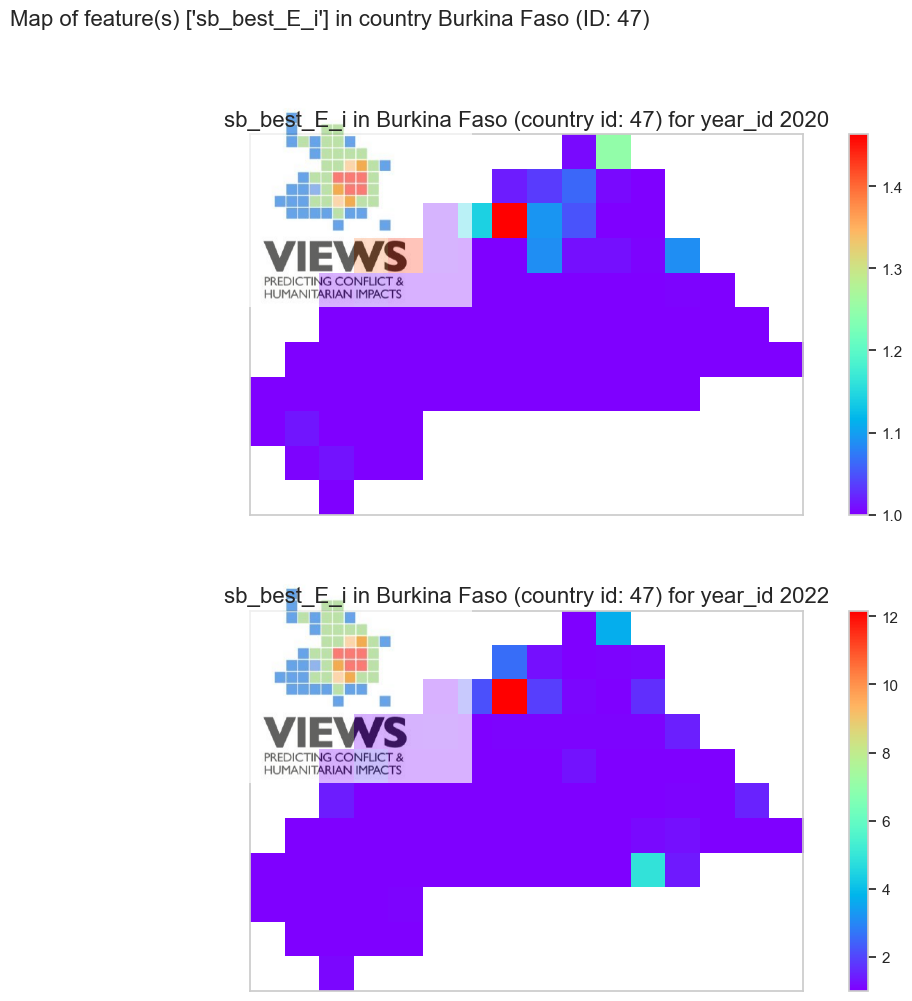

In [19]:
#country_ids = [47, 57, 237, 161, 50, 244, 162, 78, 120, 242, 235, 124, 158]

print([type(id) for id in country_ids])


for country_id in country_ids:
    plot_country_period_map(df_yearly, [country_id], ["total_best_e_i"], [2010, 2015, 2020], figsize=(12, 10), logo_size=0.5)